# Data Understanding
For each subsection will b specified:
 - the related issue: e.g. (`#3`)
 - the assignee (`djanloo`, `tommy`)

| Task | Issue | Assignee |
| ----:| -----:| --------:|
| **semantics**   | `#4`| `djanloo` |
| **distribution** | `#4`| `djanloo` |
| **quality**    | `#5`| `tommy`  |
| **transformations**    | `#5`| `tommy`  |
| **correlations**    | `#4`| `djanloo`  |

In [2]:
# Imports and preliminary stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ravdess_features.csv")
# Set to display all fields
pd.set_option('display.max_rows', 10, 'display.max_columns', None)
display(df.head())

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


### Semantics

See report for variables meaning.

#### Data types

|feature | type |
|--------|------|
|modality|?|
|vocal_channel | binary |
|emotion | categorical |
|emo_intens | binary|
|statement|binary|
|repetition|binary|
|actor|categorical (marginally ordinal)|
|sex|binary|
|**others**| quantitative |


Since `modality` is categorical with only one value we drop it now.

In [4]:
# Categorical/quantitative split
df.drop(columns=["modality"], inplace=True)
categorical_features = ["vocal_channel", "emotion","emotional_intensity", 
                        "statement", "repetition", "actor", "sex"]
quantitative_features = [feat for feat in df.columns if not feat in categorical_features]
quantitative_features

['channels',
 'sample_width',
 'frame_rate',
 'frame_width',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

In [5]:
stats = df.describe()
display(stats)

print(f"Dataset has {len(df.columns)} features")

# Print fields with missing values
print("Missing values:")
for field in stats.columns:
    missing_ratio = 1 - stats[field]["count"] / len(df) 
    if missing_ratio > 0.0:
        print(f"Field {field:>10}: {missing_ratio*100:.1f}%  of missing ")
print()
# Check for field that have only one value
print("Features that have only one value:")
for field in stats.columns:
    if stats[field]["min"] == stats[field]["max"]:
        print(f"- {field}")


,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


Dataset has 37 features
Missing values:
Field      actor: 45.9%  of missing 
Field  intensity: 33.3%  of missing 

Features that have only one value:
- sample_width
- frame_rate
- stft_max


From this we can conclude that:
- `sample_width`
- `frame_rate`
- `stft_max`

are **useless** features, since they are equal for everyone.

Furthermore, `actor` field has almost 50% of missing values, so it is higly probable that it will be useless too.

In [6]:
# Remove useless features
df.drop(columns = ["sample_width", "frame_rate", "stft_max"], inplace=True)

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


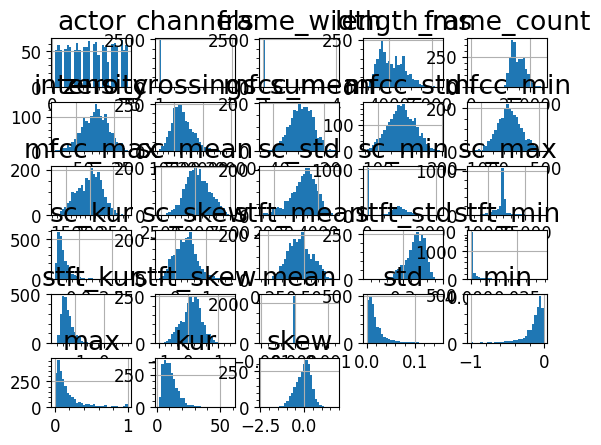

In [7]:
# pd.plotting.boxplot(np.log(df.zero_crossings_sum))

df.hist(bins=int(4*np.log(len(df))))
print()

### Distribution

### Quality

### Transformations

### Correlations

Categorical features cannot be correlated using Spearman correlation, so it is necessary to split `cat/quant`.

- Spearman correlation for numeric data
- [Cramer's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) for categorical data

A _label encoding_ is necessary to perform Cramer's V.

Finally, a cross corrrelation has to be chosen (TODO)

#### Categorical

In [15]:
# Categorical encoding
df_encoded = pd.DataFrame()
for feature in categorical_features:
    # Note: NaN values are converted to -1
    df_encoded[feature] = pd.Categorical(df[feature]).codes

df_encoded.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,1,3,0,0,1,1,0
1,1,0,0,0,0,15,0
2,-1,4,1,0,1,15,0
3,-1,7,0,1,0,13,0
4,0,4,1,0,1,1,0


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


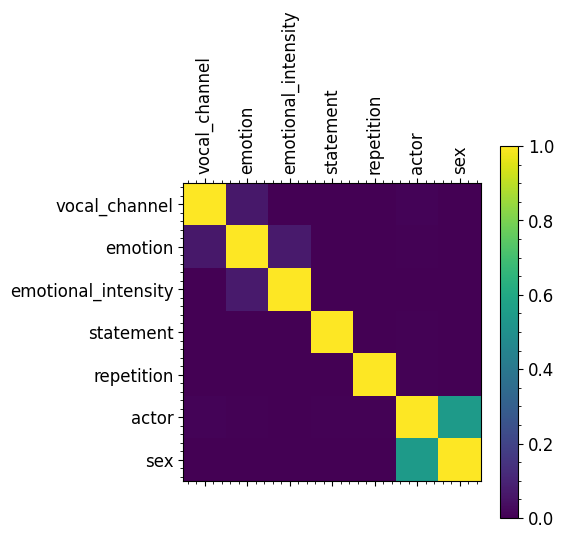

In [28]:
from scipy.stats import chi2_contingency

# Implement Cramer's V
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

V = np.zeros((len(df_encoded.columns), len(df_encoded.columns)))

for i,row in enumerate(df_encoded.columns):
  for j,col in enumerate(df_encoded.columns):
    V[i,j] =  cramers_V(df_encoded[row], df_encoded[col])
plt.matshow(V)
plt.xticks(range(len(df_encoded.columns)),labels=df_encoded.columns, rotation=90,)
plt.yticks(range(len(df_encoded.columns)),labels=df_encoded.columns)
plt.colorbar()


The only features that appear to be "V-correlated" are the sex and actor feature, that is intuitively correct.
The not complete correation is probably due to the missing values in the actor feature.

#### Numerical

/tmp/ipykernel_5022/1498411891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(method="spearman"), cmap="coolwarm")


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


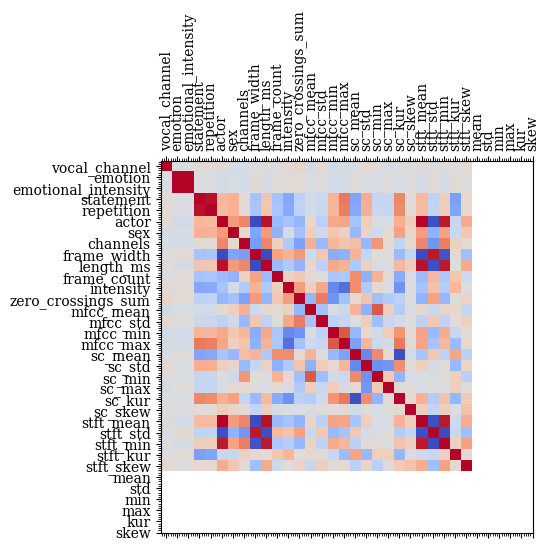

In [10]:
plt.matshow(df.corr(method="spearman"), cmap="coolwarm")
plt.xticks(range(len(df.columns)), labels=df.columns, 
            rotation=90, font={"size":10, "family":"serif"} )
plt.yticks(range(len(df.columns)), labels=df.columns, 
            rotation=0, font={"size":10, "family":"serif"} )
print()